/tmp/ipykernel_3669159/1896561342.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Gender", y="CitationCount", showfliers=False, palette=palette_Emma)


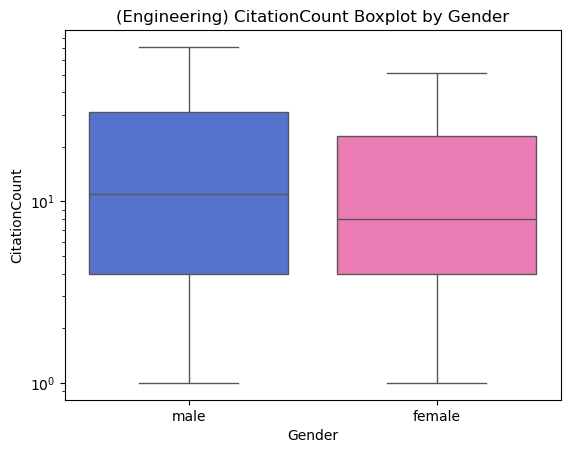

Summary Statistics of Citation Count by Gender (Engineering)
            count       mean         std  min  25%   50%   75%       max
Gender                                                                  
female   432355.0  34.899837  188.090264  1.0  4.0   8.0  23.0   27857.0
male    3159135.0  49.428321  332.547562  1.0  4.0  11.0  31.0  276200.0


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Engineering_citation_count.csv")

df_filtered = df[df["CitationCount"] > 1e-6]
df_filtered = df_filtered[df_filtered["Gender"] != "unknown"]


palette_Emma = {
    "male": "royalblue",
    "female": "hotpink"
}


sns.boxplot(data=df_filtered, x="Gender", y="CitationCount", showfliers=False, palette=palette_Emma)
plt.yscale('log')
plt.title("(Engineering) CitationCount Boxplot by Gender")
plt.show()

#print(df.groupby("Gender")["CitationCount"].describe())
print("Summary Statistics of Citation Count by Gender (Engineering)")
print(
    df[df["Gender"].isin(["male", "female"])]
    .groupby("Gender")["CitationCount"]
    .describe()
)

In [2]:
from scipy.stats import mannwhitneyu
male = df[df["Gender"] == "male"]["CitationCount"]
female = df[df["Gender"] == "female"]["CitationCount"]

stat, p = mannwhitneyu(male, female, alternative="two-sided")

print(f"Mann–Whitney U test:\nU = {stat}\np-value = {p:.4g}")

Mann–Whitney U test:
U = 750780301506.0
p-value = 0


In [3]:
top_10_percent = df[df["CitationCount"] > df["CitationCount"].quantile(0.9)]
top_gender_dist = top_10_percent["Gender"].value_counts(normalize=True)
print(top_10_percent)
print(top_gender_dist)

           AuthorId  CitationCount   Gender  log_CitationCount
3        1993674352            190     male           2.281033
5        2304076097            114  unknown           2.060698
17       2071834467            311     male           2.494155
30       2550031549             92   female           1.968483
46       3131221108             91     male           1.963788
...             ...            ...      ...                ...
5798254   111998675           1662  unknown           3.220892
5798264  2181589640            210     male           2.324282
5798268  2040862675            799     male           2.903090
5798269  2157952856            393     male           2.595496
5798271  2298861629            178  unknown           2.252853

[571815 rows x 4 columns]
Gender
male       0.544914
unknown    0.401649
female     0.053437
Name: proportion, dtype: float64


In [4]:
overall_dist = df["Gender"].value_counts(normalize=True)
print(overall_dist)

Gender
male       0.544840
unknown    0.380594
female     0.074566
Name: proportion, dtype: float64


In [3]:
import numpy as np

def gini(array):
    array = np.sort(array)
    n = len(array)
    cumulative = np.cumsum(array, dtype=float)
    relative_mean = array.mean()
    gini_index = (2 * np.sum((np.arange(1, n + 1) * array))) / (n * np.sum(array)) - (n + 1) / n
    return gini_index

import pandas as pd
for gender in df["Gender"].unique():
    group = df[df["Gender"] == gender]
    gini_score = gini(group["CitationCount"].values)
    print(f"Gini coefficient for {gender}(CitationCount): {gini_score:.4f}")

    overall_gini = gini(df["CitationCount"].values)
print(f"Overall Gini coefficient (CitationCount): {overall_gini:.4f}")

Gini coefficient for male(CitationCount): 0.7868
Gini coefficient for unknown(CitationCount): 0.7380
Gini coefficient for female(CitationCount): 0.7723
Overall Gini coefficient (CitationCount): 0.7689
